### Data Exploration and Cleaning

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Loading the dataset
dataset = pd.read_csv("dataset/Dataset.csv") 

# Display the first 5 rows to preview the data
print("Dataset Head:")
dataset.head()

Dataset Head:


,Customer_ID,Name,Age,Annual_Income,Education_Level,Occupation,City,Customer_Reviews,Purchase_Frequency,Product_Category,Target_Variable
0,CUST0001,Customer_1,64.0,77964.61,Bachelor,Engineer,Phoenix,Amazing! Highly recommended. *&,11,NaN,High
1,CUST0002,Customer_2,24.0,68414.99,High School,NaN,Chicago,"Decent quality, but shipping took too long. ##*",17,Books,Low
2,CUST0003,Customer_3,66.0,93824.94,High School,Engineer,Los Angeles,"It's okay, not the best, but does the job. %!",2,Toys,Low
3,CUST0004,Customer_4,31.0,39551.43,PhD,Engineer,Houston,Great product! Would definitely buy again. ~^#,29,NaN,Low
4,CUST0005,Customer_5,19.0,41216.05,Bachelor,Teacher,New York,"Decent quality, but shipping took too long. $#&",16,Clothing,Medium


In [3]:
# Display detailed information about the DataFrame structure and missing values
print("Dataset Info:\n")
print(dataset.info())

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         1000 non-null   object 
 1   Name                1000 non-null   object 
 2   Age                 950 non-null    float64
 3   Annual_Income       950 non-null    float64
 4   Education_Level     950 non-null    object 
 5   Occupation          950 non-null    object 
 6   City                1000 non-null   object 
 7   Customer_Reviews    950 non-null    object 
 8   Purchase_Frequency  1000 non-null   int64  
 9   Product_Category    950 non-null    object 
 10  Target_Variable     1000 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 86.1+ KB
None


In [4]:
# Drop unnecessary columns: "Customer_ID" and "Name", as these columns will be of no use.
dataset = dataset.drop(["Customer_ID", "Name"], axis = 1).copy()

Identifying Outliers

In [5]:
# Function to check whether there is outlier or not
def outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    num_outliers = outliers.shape[0]

    print(f"Number of outliers in '{column}': {num_outliers}")

In [6]:
outliers_iqr(df = dataset, column = "Annual_Income")
outliers_iqr(df = dataset, column = "Age")

Number of outliers in 'Annual_Income': 0
Number of outliers in 'Age': 0


### Feature Engineering

In [7]:
# Define column groups based on data types
numeric_cols = ["Age", "Annual_Income"]
categorical_cols = ["Education_Level", "Occupation", "Product_Category"]
text_cols = ["Customer_Reviews"]

In [8]:
# Function for filling the data
from sklearn.impute import SimpleImputer

In [9]:
# Impute numeric columns using the mean strategy
num_imputer = SimpleImputer(strategy = "mean")
dataset[numeric_cols] = num_imputer.fit_transform(dataset[numeric_cols])

In [10]:
dataset[categorical_cols] = dataset[categorical_cols].fillna("UNK")

In [11]:
# Removing rows with NaN values in 'Customer_Reviews' to maintain data integrity. 
# Filling them randomly could introduce noise, potentially misclassifying sentiment 
# (e.g., a negative review could be labeled as high or medium satisfaction).
dataset = dataset[~dataset["Customer_Reviews"].isna()]

In [12]:
# Verify that missing values are handled
print("\nMissing values after imputation:")
print(dataset.isnull().sum())


Missing values after imputation:
Age                   0
Annual_Income         0
Education_Level       0
Occupation            0
City                  0
Customer_Reviews      0
Purchase_Frequency    0
Product_Category      0
Target_Variable       0
dtype: int64


In [13]:
dataset.head()

,Age,Annual_Income,Education_Level,Occupation,City,Customer_Reviews,Purchase_Frequency,Product_Category,Target_Variable
0,64.0,77964.61,Bachelor,Engineer,Phoenix,Amazing! Highly recommended. *&,11,UNK,High
1,24.0,68414.99,High School,UNK,Chicago,"Decent quality, but shipping took too long. ##*",17,Books,Low
2,66.0,93824.94,High School,Engineer,Los Angeles,"It's okay, not the best, but does the job. %!",2,Toys,Low
3,31.0,39551.43,PhD,Engineer,Houston,Great product! Would definitely buy again. ~^#,29,UNK,Low
4,19.0,41216.05,Bachelor,Teacher,New York,"Decent quality, but shipping took too long. $#&",16,Clothing,Medium


### Data Visualization

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

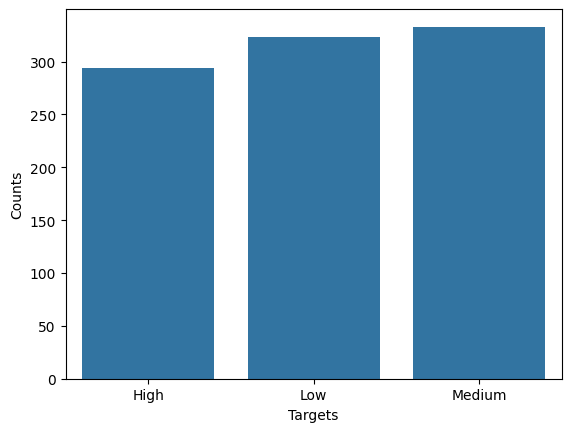

In [15]:
sns.countplot(data = dataset, x = "Target_Variable")
plt.xlabel("Targets")
plt.ylabel("Counts")
plt.show()

Data Cleaning

In [16]:
# Cleaning the text
import re

def clean_text(text):

    # Remove non-alphabetic characters and ASCII codes
    text = re.sub(r"[^a-zA-Z\s]", "", text)

    # Remove extra spaces
    text = re.sub(r"\s+", " ", text).strip()
    return text

In [17]:
# Apply the cleaning function to the "text" column
dataset["Customer_Reviews"] = dataset["Customer_Reviews"].apply(clean_text)
dataset.head()

,Age,Annual_Income,Education_Level,Occupation,City,Customer_Reviews,Purchase_Frequency,Product_Category,Target_Variable
0,64.0,77964.61,Bachelor,Engineer,Phoenix,Amazing Highly recommended,11,UNK,High
1,24.0,68414.99,High School,UNK,Chicago,Decent quality but shipping took too long,17,Books,Low
2,66.0,93824.94,High School,Engineer,Los Angeles,Its okay not the best but does the job,2,Toys,Low
3,31.0,39551.43,PhD,Engineer,Houston,Great product Would definitely buy again,29,UNK,Low
4,19.0,41216.05,Bachelor,Teacher,New York,Decent quality but shipping took too long,16,Clothing,Medium


In [18]:
# Changning the text to lower case
dataset["Customer_Reviews"] = dataset["Customer_Reviews"].str.lower()
dataset.head()

,Age,Annual_Income,Education_Level,Occupation,City,Customer_Reviews,Purchase_Frequency,Product_Category,Target_Variable
0,64.0,77964.61,Bachelor,Engineer,Phoenix,amazing highly recommended,11,UNK,High
1,24.0,68414.99,High School,UNK,Chicago,decent quality but shipping took too long,17,Books,Low
2,66.0,93824.94,High School,Engineer,Los Angeles,its okay not the best but does the job,2,Toys,Low
3,31.0,39551.43,PhD,Engineer,Houston,great product would definitely buy again,29,UNK,Low
4,19.0,41216.05,Bachelor,Teacher,New York,decent quality but shipping took too long,16,Clothing,Medium


In [19]:
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
# Get English stopwords
stop_words = set(stopwords.words("english"))

def remove_stopwords(text):
    return " ".join([word for word in text.split() if word not in stop_words])

# Apply the stopwords removal function
dataset["Customer_Reviews"] = dataset["Customer_Reviews"].apply(remove_stopwords)
dataset.head()

,Age,Annual_Income,Education_Level,Occupation,City,Customer_Reviews,Purchase_Frequency,Product_Category,Target_Variable
0,64.0,77964.61,Bachelor,Engineer,Phoenix,amazing highly recommended,11,UNK,High
1,24.0,68414.99,High School,UNK,Chicago,decent quality shipping took long,17,Books,Low
2,66.0,93824.94,High School,Engineer,Los Angeles,okay best job,2,Toys,Low
3,31.0,39551.43,PhD,Engineer,Houston,great product would definitely buy,29,UNK,Low
4,19.0,41216.05,Bachelor,Teacher,New York,decent quality shipping took long,16,Clothing,Medium


Encode categorical variables

In [21]:
# Packages for scaling and Encoding
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [22]:
# List all numeric features including "Purchase_Frequency"
numeric_features = ["Age", "Annual_Income", "Purchase_Frequency"]

# Initialising the scaler
scaler = StandardScaler()

# Fitting and transforming
dataset[numeric_features] = scaler.fit_transform(dataset[numeric_features])

In [23]:
dataset.head()

,Age,Annual_Income,Education_Level,Occupation,City,Customer_Reviews,Purchase_Frequency,Product_Category,Target_Variable
0,1.407629,0.277447,Bachelor,Engineer,Phoenix,amazing highly recommended,-0.501476,UNK,High
1,-1.230054,-0.066076,High School,UNK,Chicago,decent quality shipping took long,0.193663,Books,Low
2,1.539513,0.847982,High School,Engineer,Los Angeles,okay best job,-1.544184,Toys,Low
3,-0.768460,-1.104369,PhD,Engineer,Houston,great product would definitely buy,1.583941,UNK,Low
4,-1.559765,-1.044489,Bachelor,Teacher,New York,decent quality shipping took long,0.077807,Clothing,Medium


In [24]:
# To check different values in "Education_Level"
dataset["Education_Level"].unique()

array(['Bachelor', 'High School', 'PhD', 'Master', 'UNK'], dtype=object)

In [25]:
# Encode the ordinal feature "Education_Level"
education_order = {
    "UNK": 0,
    "High School": 1,
    "Bachelor": 2,
    "Master": 3,
    "PhD": 4
}

# Applying the encoding
dataset["Education_Level"] = dataset["Education_Level"].map(education_order)

In [26]:
dataset.head()

,Age,Annual_Income,Education_Level,Occupation,City,Customer_Reviews,Purchase_Frequency,Product_Category,Target_Variable
0,1.407629,0.277447,2,Engineer,Phoenix,amazing highly recommended,-0.501476,UNK,High
1,-1.230054,-0.066076,1,UNK,Chicago,decent quality shipping took long,0.193663,Books,Low
2,1.539513,0.847982,1,Engineer,Los Angeles,okay best job,-1.544184,Toys,Low
3,-0.768460,-1.104369,4,Engineer,Houston,great product would definitely buy,1.583941,UNK,Low
4,-1.559765,-1.044489,2,Teacher,New York,decent quality shipping took long,0.077807,Clothing,Medium


In [27]:
# One-hot encode categorical features
dataset_encoded = pd.get_dummies(dataset, columns=["Occupation", "City", "Product_Category"], drop_first = True)

In [28]:
# Convert only numeric columns to float
numeric_columns = dataset_encoded.select_dtypes(include=[np.number]).columns
dataset_encoded[numeric_columns] = dataset_encoded[numeric_columns].astype(np.float64)

In [29]:
# Convert boolean columns to 1 (True) and 0 (False)
dataset_encoded = dataset_encoded.applymap(lambda x: 1 if x == True else (0 if x == False else x))

C:\Users\rahul\AppData\Local\Temp\ipykernel_34736\2380828249.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dataset_encoded = dataset_encoded.applymap(lambda x: 1 if x == True else (0 if x == False else x))


In [30]:
dataset_encoded.head()

,Age,Annual_Income,Education_Level,Customer_Reviews,Purchase_Frequency,Target_Variable,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Scientist,...,Occupation_UNK,City_Houston,City_Los Angeles,City_New York,City_Phoenix,Product_Category_Clothing,Product_Category_Electronics,Product_Category_Home Appliances,Product_Category_Toys,Product_Category_UNK
0,1.407629,0.277447,2.0,amazing highly recommended,-0.501476,High,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,-1.230054,-0.066076,1.0,decent quality shipping took long,0.193663,Low,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.539513,0.847982,1.0,okay best job,-1.544184,Low,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,-0.768460,-1.104369,4.0,great product would definitely buy,1.583941,Low,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
4,-1.559765,-1.044489,2.0,decent quality shipping took long,0.077807,Medium,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [31]:
dataset = dataset_encoded.copy()

In [32]:
# Encode the target variable using LabelEncoder
le = LabelEncoder()

dataset["Target"] = le.fit_transform(dataset["Target_Variable"])

dataset.drop("Target_Variable", axis = 1, inplace = True)

In [33]:
dataset.head()

,Age,Annual_Income,Education_Level,Customer_Reviews,Purchase_Frequency,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Scientist,Occupation_Teacher,...,City_Houston,City_Los Angeles,City_New York,City_Phoenix,Product_Category_Clothing,Product_Category_Electronics,Product_Category_Home Appliances,Product_Category_Toys,Product_Category_UNK,Target
0,1.407629,0.277447,2.0,amazing highly recommended,-0.501476,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,-1.230054,-0.066076,1.0,decent quality shipping took long,0.193663,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1.539513,0.847982,1.0,okay best job,-1.544184,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1
3,-0.768460,-1.104369,4.0,great product would definitely buy,1.583941,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,1
4,-1.559765,-1.044489,2.0,decent quality shipping took long,0.077807,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,2


Extract meaningful insights from textual data using TF-IDF

In [34]:
# Process textual data: Convert 'Customer_Reviews' into numerical features using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=100)  # Limit to top 100 features to control dimensionality
tfidf_matrix = tfidf.fit_transform(dataset['Customer_Reviews'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

In [35]:
# Concatenate TF-IDF features with the main DataFrame and remove the original text column
df = pd.concat([dataset.reset_index(drop=True), tfidf_df.reset_index(drop=True)], axis=1)
df.drop('Customer_Reviews', axis=1, inplace=True)

print("\nDataFrame after Feature Engineering:")
df.head()


DataFrame after Feature Engineering:


,Age,Annual_Income,Education_Level,Purchase_Frequency,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Scientist,Occupation_Teacher,Occupation_UNK,...,purchase,quality,recommended,service,shipping,shopping,terrible,took,worst,would
0,1.407629,0.277447,2.0,-0.501476,0,1,0,0,0,0,...,0.0,0.000000,0.57735,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
1,-1.230054,-0.066076,1.0,0.193663,0,0,0,0,0,1,...,0.0,0.447214,0.00000,0.0,0.447214,0.0,0.0,0.447214,0.0,0.000000
2,1.539513,0.847982,1.0,-1.544184,0,1,0,0,0,0,...,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
3,-0.768460,-1.104369,4.0,1.583941,0,1,0,0,0,0,...,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.465498
4,-1.559765,-1.044489,2.0,0.077807,0,0,0,0,1,0,...,0.0,0.447214,0.00000,0.0,0.447214,0.0,0.0,0.447214,0.0,0.000000


###  Dimensionality Reduction and Clustering

In [36]:
from sklearn.decomposition import PCA

# Initialize PCA with 2 components
pca = PCA(n_components = 2) 


pca_df = df.drop("Target", axis=1)

# Fit PCA on the data
features_reduced = pca.fit_transform(pca_df)

pca_df= pd.DataFrame()

pca_df["PCA1"] = features_reduced[:, 0]
pca_df["PCA2"] = features_reduced[:, 1]
pca_df.head()

,PCA1,PCA2
0,0.181758,-0.454968
1,1.460936,0.439502
2,1.266072,0.287757
3,-1.649225,-0.813631
4,0.578639,0.291866


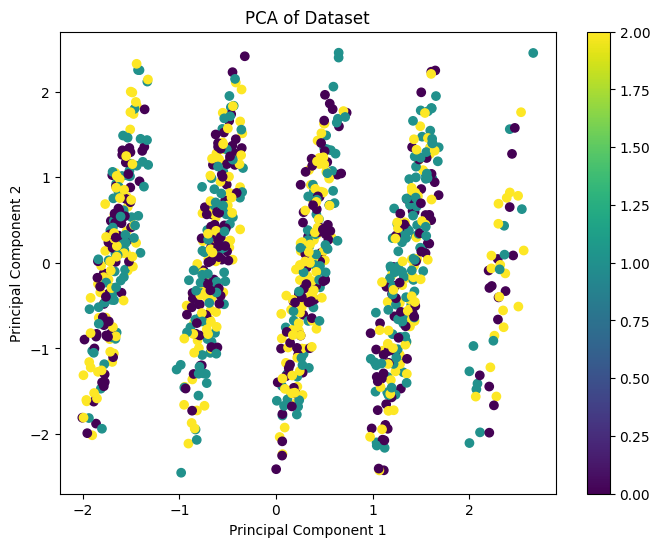

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Reattach the target variable for coloring if needed
pca_df['Target'] = df['Target']

# Plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['Target'], cmap='viridis')
plt.title('PCA of Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter)
plt.show()

In [38]:
from sklearn.cluster import KMeans

# Number of clusters
k = 3

# Initialize KMeans
kmeans = KMeans(n_clusters = k, random_state = 0)

# Fit KMeans on the PCA-reduced data
pca_df['Cluster'] = kmeans.fit_predict(pca_df[['PCA1', 'PCA2']])

# Display the first few rows of the dataframe with cluster labels
print(pca_df.head())

       PCA1      PCA2  Target  Cluster
0  0.181758 -0.454968       0        0
1  1.460936  0.439502       1        2
2  1.266072  0.287757       1        2
3 -1.649225 -0.813631       1        1
4  0.578639  0.291866       2        2


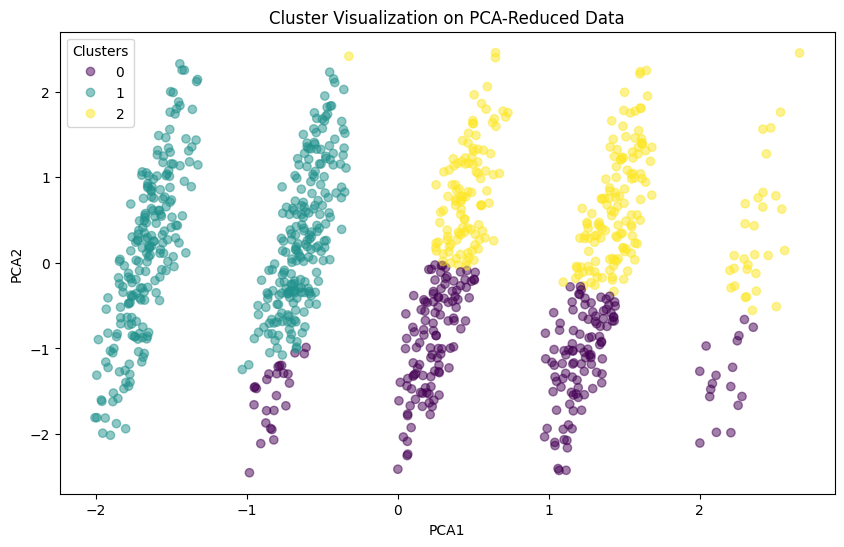

In [39]:
# Create a scatter plot of the PCA-reduced data
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['Cluster'], cmap='viridis', alpha=0.5)

# Add a legend with cluster labels
plt.legend(*scatter.legend_elements(), title="Clusters")

# Add labels and a title
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Cluster Visualization on PCA-Reduced Data')

# Show the plot
plt.show()

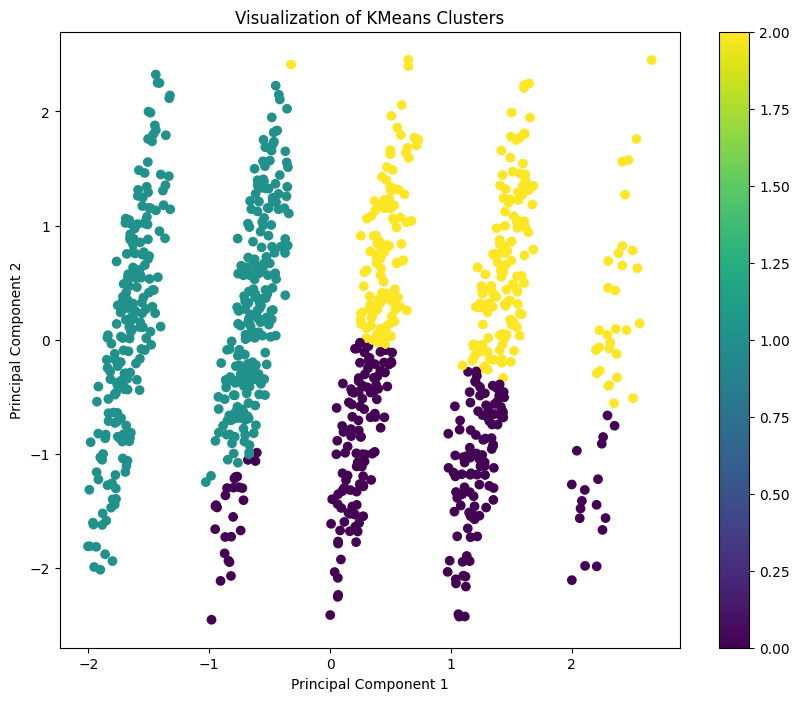

In [40]:
# Plotting
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['Cluster'], cmap='viridis', label=pca_df['Cluster'])
plt.title('Visualization of KMeans Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter)
plt.show()

### Machine Learning Model Development

In [41]:
X = df.drop("Target", axis = 1)
y = df["Target"]

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

In [43]:
# Split the data into training (80%) and testing (20%) sets, preserving class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Define multiple classification models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

In [44]:
# Store results for comparison
results = {}

# Train each model and output performance metrics
for model_name, model in models.items():
    print(f"\n{'='*10} Training {model_name} {'='*10}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy  # Store accuracy for comparison

    # Display results
    print(f"\n{model_name} Classification Report:\n")
    print(classification_report(y_test, y_pred, zero_division=0))
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    
# Print final accuracy comparison
print("\n\n=== Model Performance Comparison ===")
for model, acc in sorted(results.items(), key=lambda x: x[1], reverse=True):
    print(f"{model}: {acc:.4f}")



========== Training Decision Tree ==========

Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       0.29      0.29      0.29        59
           1       0.33      0.34      0.34        64
           2       0.38      0.37      0.38        67

    accuracy                           0.34       190
   macro avg       0.34      0.34      0.33       190
weighted avg       0.34      0.34      0.34       190

Decision Tree Accuracy: 0.3368

========== Training SVM ==========

SVM Classification Report:

              precision    recall  f1-score   support

           0       0.27      0.14      0.18        59
           1       0.35      0.39      0.37        64
           2       0.34      0.45      0.39        67

    accuracy                           0.33       190
   macro avg       0.32      0.32      0.31       190
weighted avg       0.32      0.33      0.32       190

SVM Accuracy: 0.3316

========== Training Random Forest =

Model Evaluation

In [45]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

def evaluate_model(y_true, y_pred):
    
    metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_true, y_pred, average='weighted', zero_division=0),
        'F1 Score': f1_score(y_true, y_pred, average='weighted', zero_division=0)
    }
    return metrics

In [46]:
# Train each model and evaluate
results = {}

for model_name, model in models.items():
    print(f"\n{'='*10} Training {model_name} {'='*10}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate the model
    evaluated_metrics = evaluate_model(y_test, y_pred)
    results[model_name] = evaluated_metrics

    # Display results
    print(f"\n{model_name} Evaluation Metrics:")
    for metric_name, metric_value in evaluated_metrics.items():
        print(f"{metric_name}: {metric_value:.4f}")


========== Training Decision Tree ==========

Decision Tree Evaluation Metrics:
Accuracy: 0.3368
Precision: 0.3369
Recall: 0.3368
F1 Score: 0.3368

========== Training SVM ==========

SVM Evaluation Metrics:
Accuracy: 0.3316
Precision: 0.3200
Recall: 0.3316
F1 Score: 0.3162

========== Training Random Forest ==========

Random Forest Evaluation Metrics:
Accuracy: 0.3474
Precision: 0.3453
Recall: 0.3474
F1 Score: 0.3450

========== Training Logistic Regression ==========

Logistic Regression Evaluation Metrics:
Accuracy: 0.3842
Precision: 0.3891
Recall: 0.3842
F1 Score: 0.3792

========== Training K-Nearest Neighbors ==========

K-Nearest Neighbors Evaluation Metrics:
Accuracy: 0.3158
Precision: 0.3134
Recall: 0.3158
F1 Score: 0.3106

========== Training Gradient Boosting ==========

Gradient Boosting Evaluation Metrics:
Accuracy: 0.3579
Precision: 0.3571
Recall: 0.3579
F1 Score: 0.3519


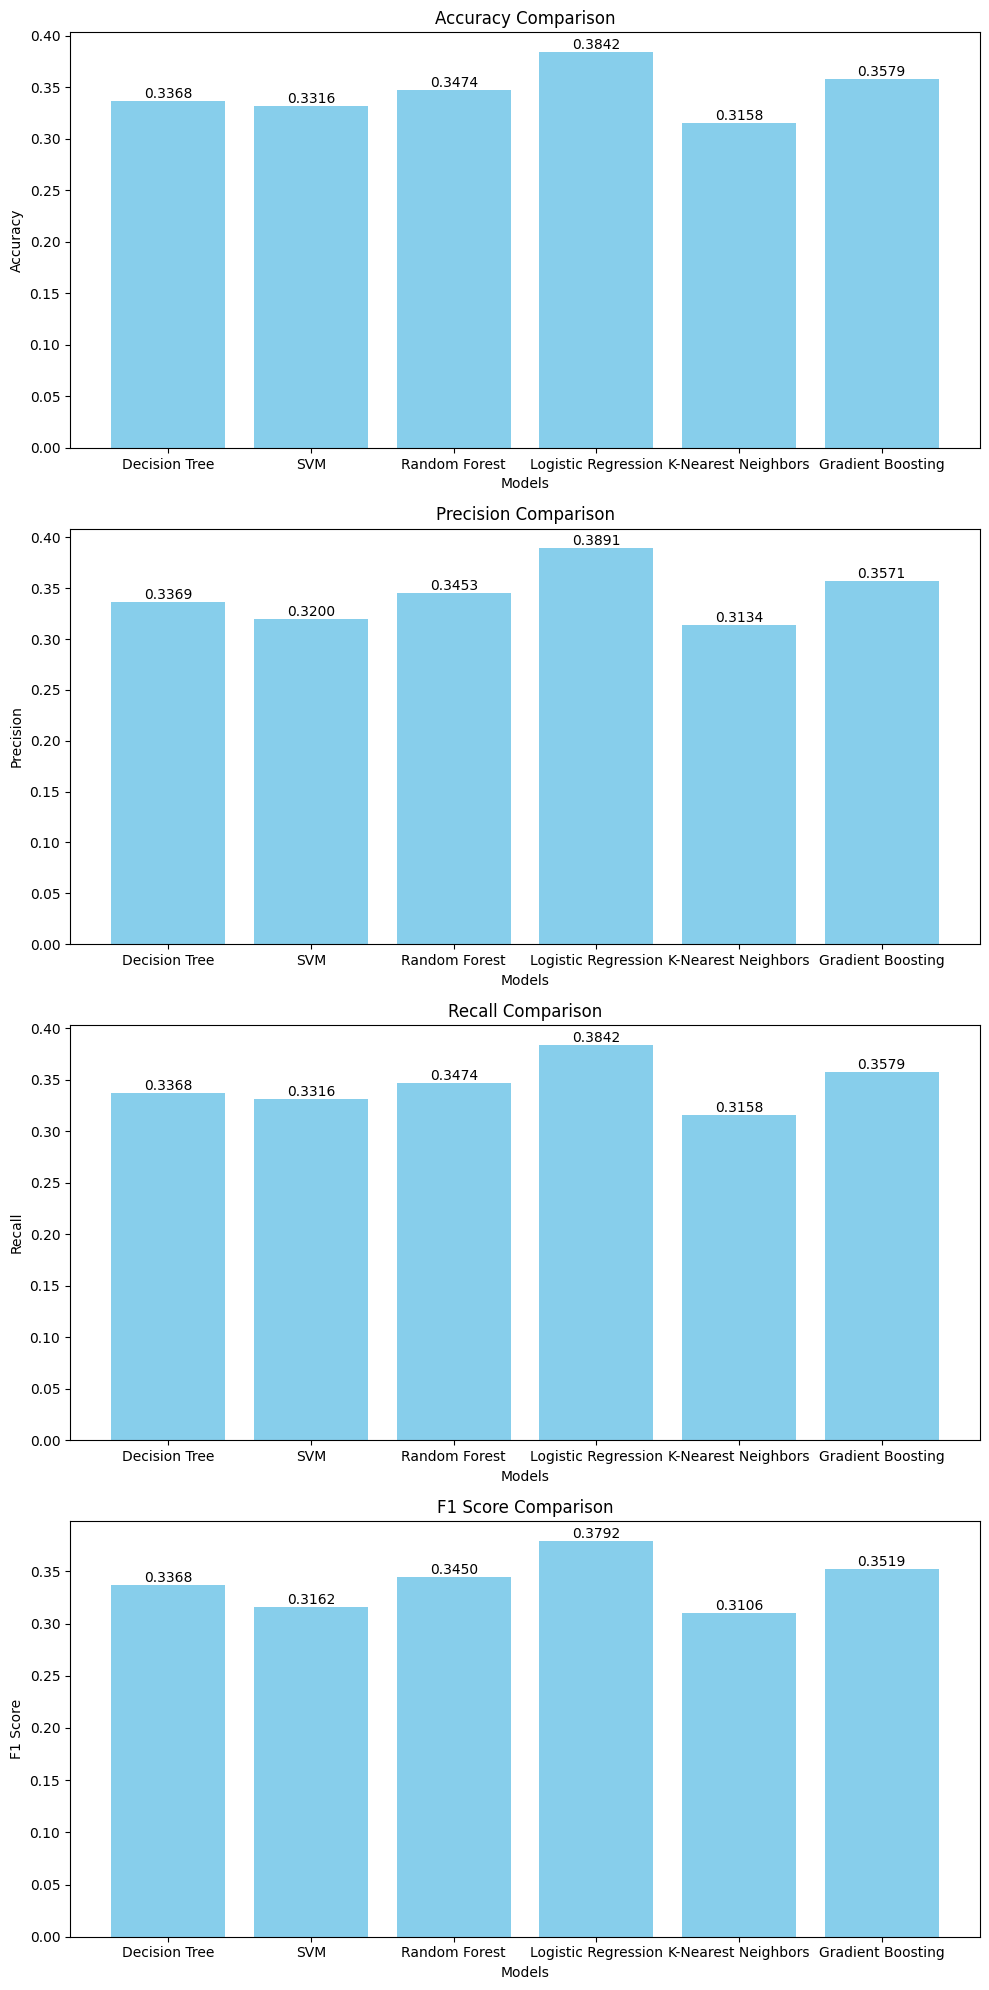

In [47]:
# Plotting the metrics for each model
metrics_to_plot = list(results[next(iter(results))].keys())

fig, axes = plt.subplots(nrows = len(metrics_to_plot), ncols = 1, figsize = (10, 5 * len(metrics_to_plot)))

for i, metric in enumerate(metrics_to_plot):
    ax = axes[i] if len(metrics_to_plot) > 1 else axes
    values = [results[model][metric] for model in results]
    ax.bar(results.keys(), values, color = "skyblue")
    ax.set_title(f"{metric} Comparison")
    ax.set_ylabel(metric)
    ax.set_xlabel("Models")
    
    for index, value in enumerate(values):
        ax.text(index, value, f"{value:.4f}", ha = "center", va = "bottom")

plt.tight_layout()
plt.show()

Hyper Parameter Tuning

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [49]:
# Define the parameter grid for Random Forest.
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

In [50]:
# Set up GridSearchCV for Random Forest.
grid_search = GridSearchCV(RandomForestClassifier(random_state = 42), param_grid, cv = 5, scoring = 'accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [51]:
# Print the best parameters.
print("\nBest parameters for Random Forest:")
print(grid_search.best_params_)


Best parameters for Random Forest:
{'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 200}


In [52]:
# Extract the best estimator.
best_rf = grid_search.best_estimator_

# Evaluate accuracy on training and test sets.
train_accuracy = accuracy_score(y_train, best_rf.predict(X_train))
test_accuracy = accuracy_score(y_test, best_rf.predict(X_test))

print(f"\nTraining Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Training Accuracy: 0.6882
Test Accuracy: 0.3158


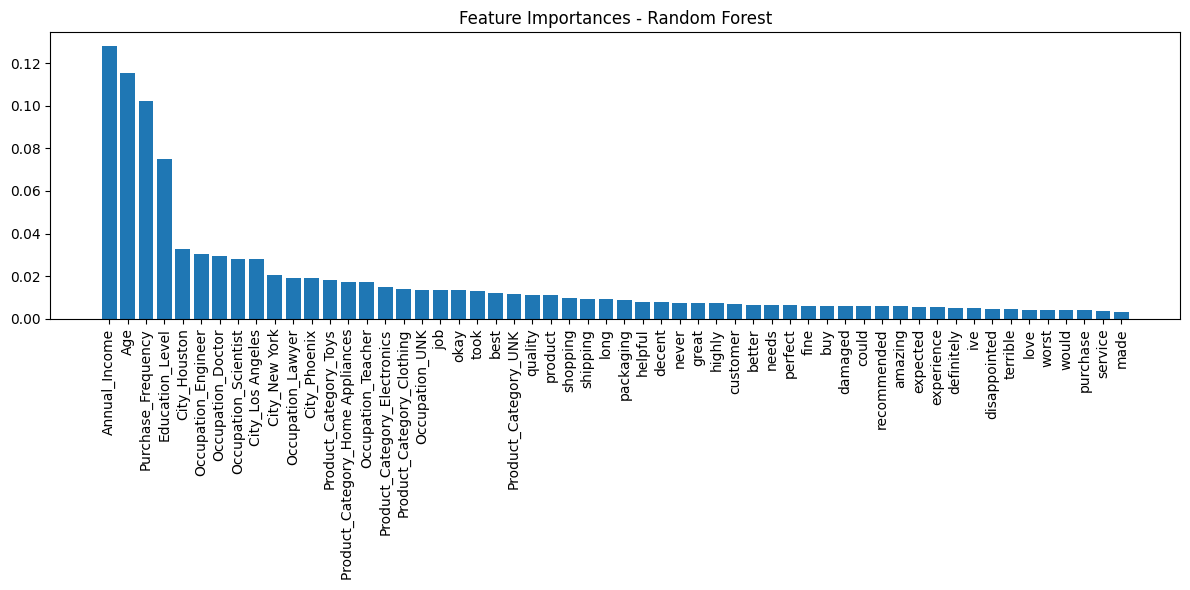

In [53]:
# Visualize feature importances.
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns

plt.figure(figsize = (12, 6))
plt.title("Feature Importances - Random Forest")
plt.bar(range(len(importances)), importances[indices], align = "center")
plt.xticks(range(len(importances)), feature_names[indices], rotation = 90)
plt.tight_layout()
plt.show()

###  Model Interpretation

In [54]:
import lime
import lime.lime_tabular

In [55]:
# Initialize the LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data = np.array(X_train),
    feature_names = X_train.columns,
    class_names = ['Low', 'Medium', 'High'],
    mode = 'classification'
)

In [56]:
idx = 0
instance = X_test.iloc[idx].values

# Generate the LIME explanation
exp = explainer.explain_instance(
    data_row = instance, 
    predict_fn = best_rf.predict_proba,
    labels = [0, 1, 2]
)

# Visualize the explanation
exp.show_in_notebook(show_table = True, show_all = False)

c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
